In [1]:
# result comparison between deployments, encounters

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report

In [3]:
result_path  = '/home/ys587/__Data/__whistle/__whistle_30_species/__fit_result_species/__final'

In [4]:
species_dict = {'BD': 0, 'CD': 1, 'STR': 2, 'SPT': 3, 'SPIN': 4, 'PLT': 5, 'RT': 6,  'FKW': 7}
num_species = len(species_dict)
species_list = list(species_dict.keys())
species_id = list(species_dict.values())

In [5]:
## result folders


In [6]:
# # run 0 
# deploy_split_folder = '20210520_155025_deployment_run0'
# encounter_split_folder = '20210520_104352_encounter_run0'
# clip_split_folder = '20210523_204759_clip_run0'

# run 1
# deploy_split_folder = '20210526_200926_deployment_run1'
# encounter_split_folder = '20210601_114359_encounter_run1'
# clip_split_folder = '20210528_125238_clip_run1'

# run 2
deploy_split_folder = '20210601_160023_deployment_run2'
encounter_split_folder = '20210604_113635_encounter_run2'
clip_split_folder = '20210603_015031_clip_run2'

# Deployment split

In [7]:
# deployment: e.g. STAR2006_test_results.npz
deployment_list = ['STAR2000', 'STAR2003', 'STAR2006', 'HICEAS2002', 'PICEAS2005']

# for ii in range(len(deployment_list)):
label_test_all  = []
label_pred_all = []
for ee in deployment_list:
    label_temp = np.load(os.path.join(result_path, deploy_split_folder, ee+'_test_results.npz'))
    label_test_all.append(label_temp['label_test'])
    label_pred_all.append(label_temp['label_pred'])
label_pred_all = np.concatenate(label_pred_all)
label_test_all = np.concatenate(label_test_all)

In [8]:
np.argmax(label_pred_all, axis=1).shape

(20074,)

In [9]:
print(classification_report(label_test_all, np.argmax(label_pred_all, axis=1), target_names=species_list, digits=3)) #)  #, target_names=None, sample_weight=None2, output_dict=False, zero_division='warn')

              precision    recall  f1-score   support

          BD      0.052     0.053     0.053      2160
          CD      0.365     0.267     0.308      4715
         STR      0.286     0.395     0.332      2691
         SPT      0.432     0.207     0.280      2392
        SPIN      0.166     0.069     0.098      1123
         PLT      0.266     0.505     0.348      2164
          RT      0.314     0.391     0.348      1404
         FKW      0.690     0.651     0.670      3425

    accuracy                          0.343     20074
   macro avg      0.321     0.317     0.305     20074
weighted avg      0.359     0.343     0.338     20074



## Confusion matrix

In [10]:
np.set_printoptions(linewidth=200, precision=2, suppress=True)

In [11]:
print("Confusion matrix:")
# cm = confusion_matrix(label_train[:label_train_pred.shape[0]], np.argmax(label_train_pred, axis=1), labels=species_id)
cm = confusion_matrix(label_test_all, np.argmax(label_pred_all, axis=1), labels=species_id)

print(species_list)
print('')
print(cm)
print('')

cm2 = cm*1.0
for ii in range(cm.shape[0]):
    cm_row = cm[ii, :]*1.0

    cm_row_sum = cm_row.sum()
    if cm_row_sum != 0:
        cm2[ii, :] = cm_row / cm_row_sum
    else:
        cm2[ii, :] = np.zeros(cm.shape[1])

print(cm2)

Confusion matrix:
['BD', 'CD', 'STR', 'SPT', 'SPIN', 'PLT', 'RT', 'FKW']

[[ 115  401  628  256  111  497  114   38]
 [ 669 1259  991  117   53  867  546  213]
 [ 428  557 1062  120   70  244  109  101]
 [ 330  537  491  495   90  206  184   59]
 [ 344  157  279   74   78  106   52   33]
 [ 193  343  135   52   31 1093   58  259]
 [  83  140   41   12   33  247  549  299]
 [  46   58   81   21    3  852  136 2228]]

[[0.05 0.19 0.29 0.12 0.05 0.23 0.05 0.02]
 [0.14 0.27 0.21 0.02 0.01 0.18 0.12 0.05]
 [0.16 0.21 0.39 0.04 0.03 0.09 0.04 0.04]
 [0.14 0.22 0.21 0.21 0.04 0.09 0.08 0.02]
 [0.31 0.14 0.25 0.07 0.07 0.09 0.05 0.03]
 [0.09 0.16 0.06 0.02 0.01 0.51 0.03 0.12]
 [0.06 0.1  0.03 0.01 0.02 0.18 0.39 0.21]
 [0.01 0.02 0.02 0.01 0.   0.25 0.04 0.65]]


In [12]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=species_list)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=species_list)

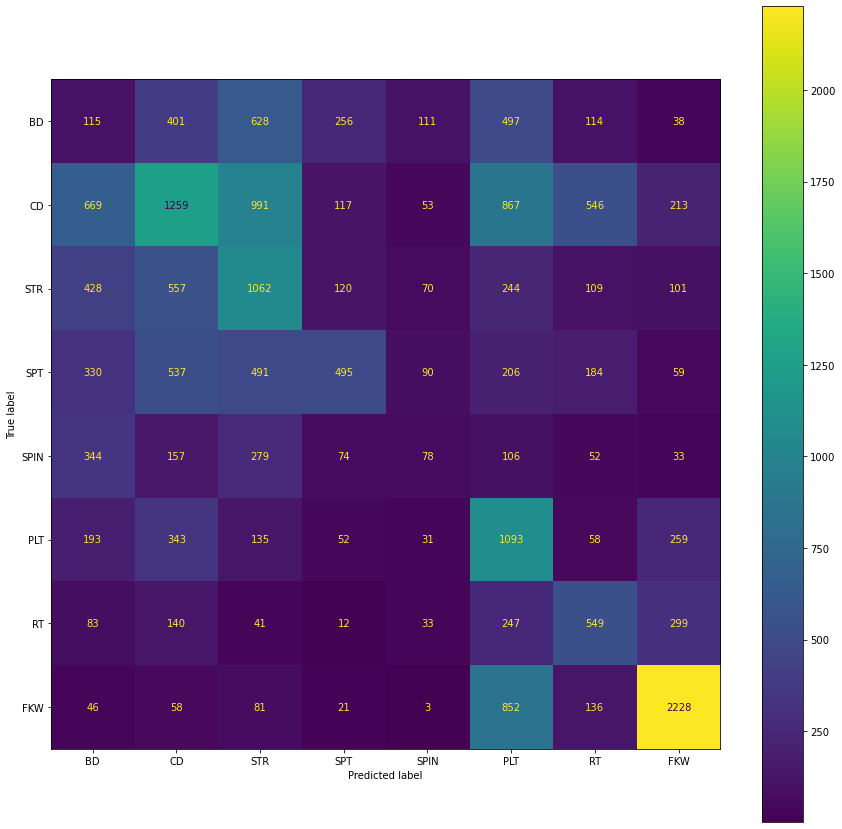

In [13]:
fig, ax = plt.subplots(figsize=[15, 15])
disp.plot(include_values=True,
                     cmap='viridis', ax=ax, xticks_rotation='horizontal',
                     values_format=None, colorbar=True)


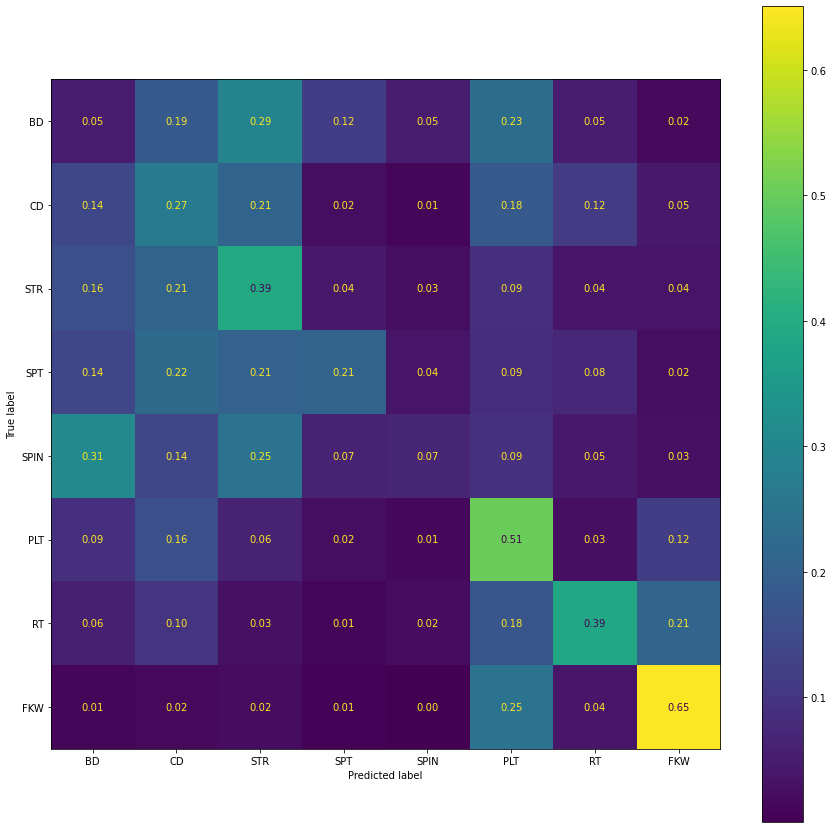

In [14]:
fig, ax = plt.subplots(figsize=[15, 15])
disp2.plot(include_values=True,
                     cmap='viridis', ax=ax, xticks_rotation='horizontal',
                     values_format='.2f', colorbar=True)

# Enounter split

In [15]:
# enounter: e.g. fold0_test_results.npz, 
encounter_list = ['fold0', 'fold1', 'fold2', 'fold3', 'fold4']
# result_encounter = np.load(os.path.join(result_path, '20210520_104352_encounter'))

# for ii in range(len(encounter_list)):
label_test_all  = []
label_pred_all = []
for ee in encounter_list:
    label_temp = np.load(os.path.join(result_path, encounter_split_folder, ee+'_test_results.npz'))
    label_test_all.append(label_temp['label_test'])
    label_pred_all.append(label_temp['label_pred'])
label_pred_all = np.concatenate(label_pred_all)
label_test_all = np.concatenate(label_test_all)

In [16]:
print(classification_report(label_test_all, np.argmax(label_pred_all, axis=1), target_names=species_list, digits=3)) #)  #, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')

              precision    recall  f1-score   support

          BD      0.459     0.448     0.453      2160
          CD      0.521     0.707     0.600      4715
         STR      0.353     0.431     0.388      2691
         SPT      0.385     0.120     0.183      2392
        SPIN      0.220     0.127     0.161      1123
         PLT      0.535     0.683     0.600      2164
          RT      0.430     0.431     0.431      1404
         FKW      0.697     0.554     0.617      3425

    accuracy                          0.492     20074
   macro avg      0.450     0.438     0.429     20074
weighted avg      0.484     0.492     0.473     20074



## Confusion matrix

In [17]:
np.set_printoptions(linewidth=200, precision=2, suppress=True)

In [18]:
print("Confusion matrix:")
# cm = confusion_matrix(label_train[:label_train_pred.shape[0]], np.argmax(label_train_pred, axis=1), labels=species_id)
cm = confusion_matrix(label_test_all, np.argmax(label_pred_all, axis=1), labels=species_id)

print(species_list)
print('')
print(cm)
print('')

cm2 = cm*1.0
for ii in range(cm.shape[0]):
    cm_row = cm[ii, :]*1.0

    cm_row_sum = cm_row.sum()
    if cm_row_sum != 0:
        cm2[ii, :] = cm_row / cm_row_sum
    else:
        cm2[ii, :] = np.zeros(cm.shape[1])

print(cm2)

Confusion matrix:
['BD', 'CD', 'STR', 'SPT', 'SPIN', 'PLT', 'RT', 'FKW']

[[ 968  216  407  100  171  189   66   43]
 [  53 3334  893  214   55   83   43   40]
 [ 133 1072 1159   51   76   81   27   92]
 [ 358 1112  369  287  109  133    9   15]
 [ 281  358  188   49  143   14   64   26]
 [ 152  112  143   16   15 1479   29  218]
 [  98   91   56    8   48  106  605  392]
 [  67  101   66   21   32  678  563 1897]]

[[0.45 0.1  0.19 0.05 0.08 0.09 0.03 0.02]
 [0.01 0.71 0.19 0.05 0.01 0.02 0.01 0.01]
 [0.05 0.4  0.43 0.02 0.03 0.03 0.01 0.03]
 [0.15 0.46 0.15 0.12 0.05 0.06 0.   0.01]
 [0.25 0.32 0.17 0.04 0.13 0.01 0.06 0.02]
 [0.07 0.05 0.07 0.01 0.01 0.68 0.01 0.1 ]
 [0.07 0.06 0.04 0.01 0.03 0.08 0.43 0.28]
 [0.02 0.03 0.02 0.01 0.01 0.2  0.16 0.55]]


In [19]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=species_list)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=species_list)

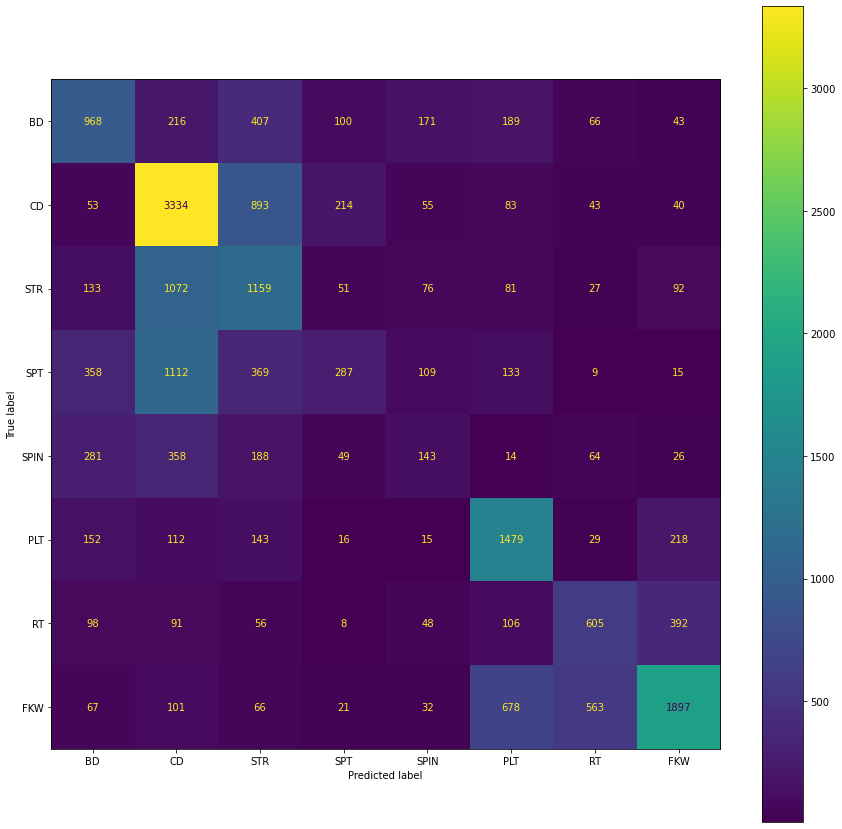

In [20]:
fig, ax = plt.subplots(figsize=[15, 15])
disp.plot(include_values=True,
                     cmap='viridis', ax=ax, xticks_rotation='horizontal',
                     values_format=None, colorbar=True)


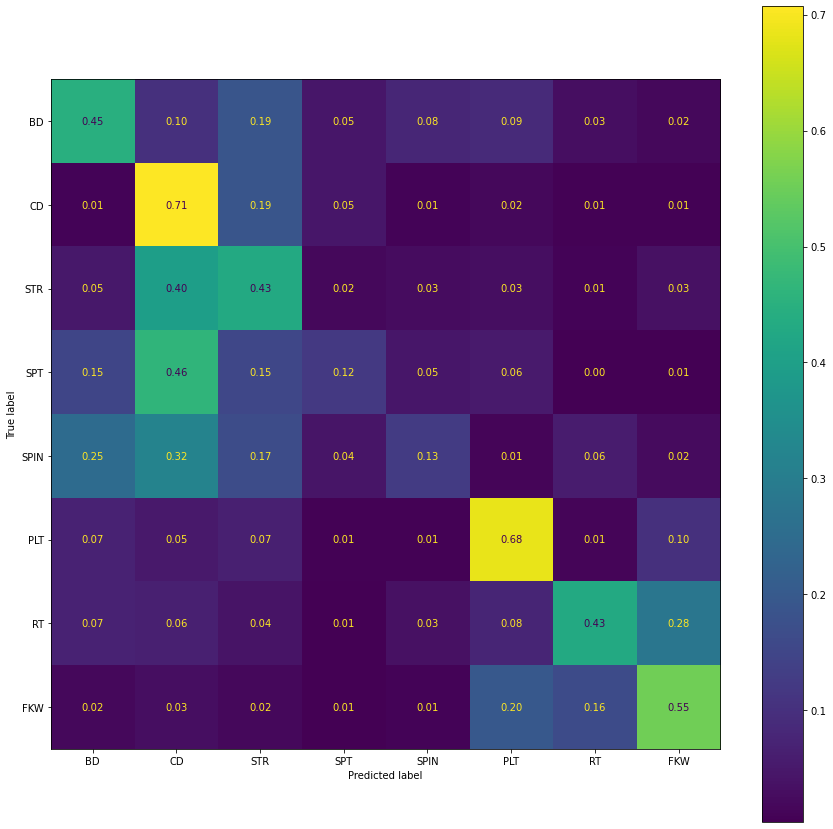

In [21]:
fig, ax = plt.subplots(figsize=[15, 15])
disp2.plot(include_values=True,
                     cmap='viridis', ax=ax, xticks_rotation='horizontal',
                     values_format='.2f', colorbar=True)

# Clip split

In [22]:
# enounter: e.g. fold0_test_results.npz, 
clip_list = ['fold0', 'fold1', 'fold2', 'fold3', 'fold4']

# for ii in range(len(clip_list)):
label_test_all  = []
label_pred_all = []
for ee in clip_list:
    label_temp = np.load(os.path.join(result_path, clip_split_folder, ee+'_test_results.npz'))
    label_test_all.append(label_temp['label_test'])
    label_pred_all.append(label_temp['label_pred'])
label_pred_all = np.concatenate(label_pred_all)
label_test_all = np.concatenate(label_test_all)

In [23]:
print(classification_report(label_test_all, np.argmax(label_pred_all, axis=1), target_names=species_list, digits=3)) #)  #, target_names=None, sample_weight=None, output_dict=False, zero_division='warn')

              precision    recall  f1-score   support

          BD      0.547     0.576     0.561      2160
          CD      0.674     0.693     0.683      4715
         STR      0.518     0.546     0.531      2691
         SPT      0.572     0.550     0.561      2392
        SPIN      0.424     0.351     0.384      1123
         PLT      0.681     0.730     0.704      2164
          RT      0.698     0.564     0.624      1404
         FKW      0.840     0.839     0.839      3425

    accuracy                          0.644     20074
   macro avg      0.619     0.606     0.611     20074
weighted avg      0.644     0.644     0.643     20074



## Confusion matrix

In [24]:
np.set_printoptions(linewidth=200, precision=2, suppress=True)

In [25]:
print("Confusion matrix:")
# cm = confusion_matrix(label_train[:label_train_pred.shape[0]], np.argmax(label_train_pred, axis=1), labels=species_id)
cm = confusion_matrix(label_test_all, np.argmax(label_pred_all, axis=1), labels=species_id)

print(species_list)
print('')
print(cm)
print('')

cm2 = cm*1.0
for ii in range(cm.shape[0]):
    cm_row = cm[ii, :]*1.0

    cm_row_sum = cm_row.sum()
    if cm_row_sum != 0:
        cm2[ii, :] = cm_row / cm_row_sum
    else:
        cm2[ii, :] = np.zeros(cm.shape[1])

print(cm2)

Confusion matrix:
['BD', 'CD', 'STR', 'SPT', 'SPIN', 'PLT', 'RT', 'FKW']

[[1245  143  254  188  192   58   48   32]
 [  54 3269  622  502  102   60   52   54]
 [ 187  633 1468  144   99   76   31   53]
 [ 335  323  199 1316   79  106   20   14]
 [ 209  225  110   81  394   16   68   20]
 [ 148  146   98   24    9 1579   23  137]
 [  70   84   45   37   41   96  792  239]
 [  29   30   40    9   14  328  101 2874]]

[[0.58 0.07 0.12 0.09 0.09 0.03 0.02 0.01]
 [0.01 0.69 0.13 0.11 0.02 0.01 0.01 0.01]
 [0.07 0.24 0.55 0.05 0.04 0.03 0.01 0.02]
 [0.14 0.14 0.08 0.55 0.03 0.04 0.01 0.01]
 [0.19 0.2  0.1  0.07 0.35 0.01 0.06 0.02]
 [0.07 0.07 0.05 0.01 0.   0.73 0.01 0.06]
 [0.05 0.06 0.03 0.03 0.03 0.07 0.56 0.17]
 [0.01 0.01 0.01 0.   0.   0.1  0.03 0.84]]


In [26]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=species_list)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=species_list)

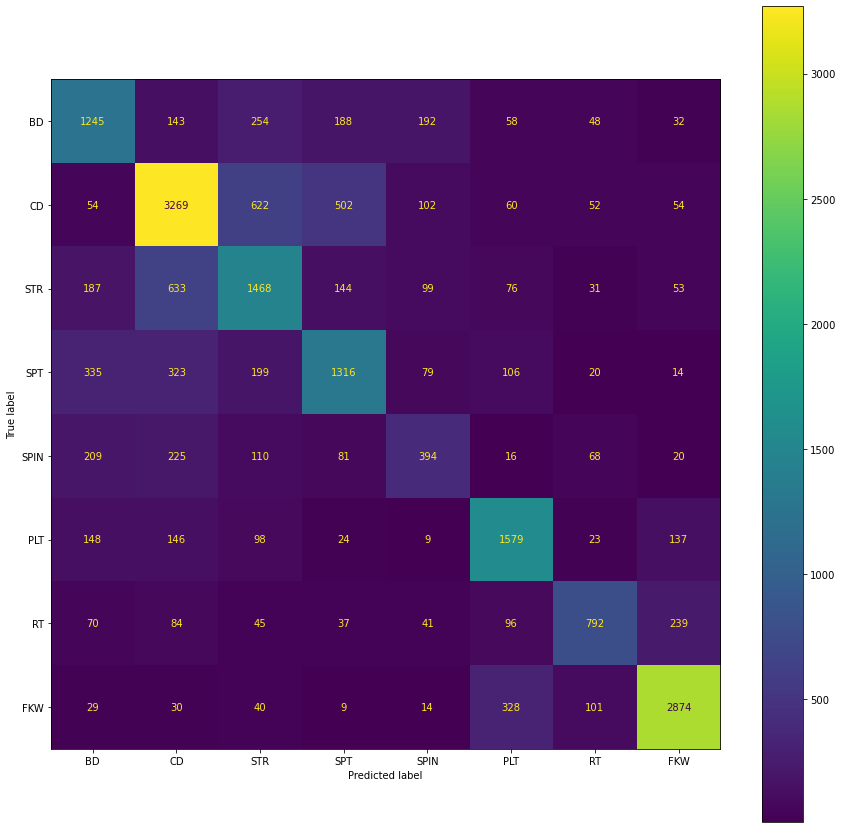

In [27]:
fig, ax = plt.subplots(figsize=[15, 15])
disp.plot(include_values=True,
                     cmap='viridis', ax=ax, xticks_rotation='horizontal',
                     values_format=None, colorbar=True)


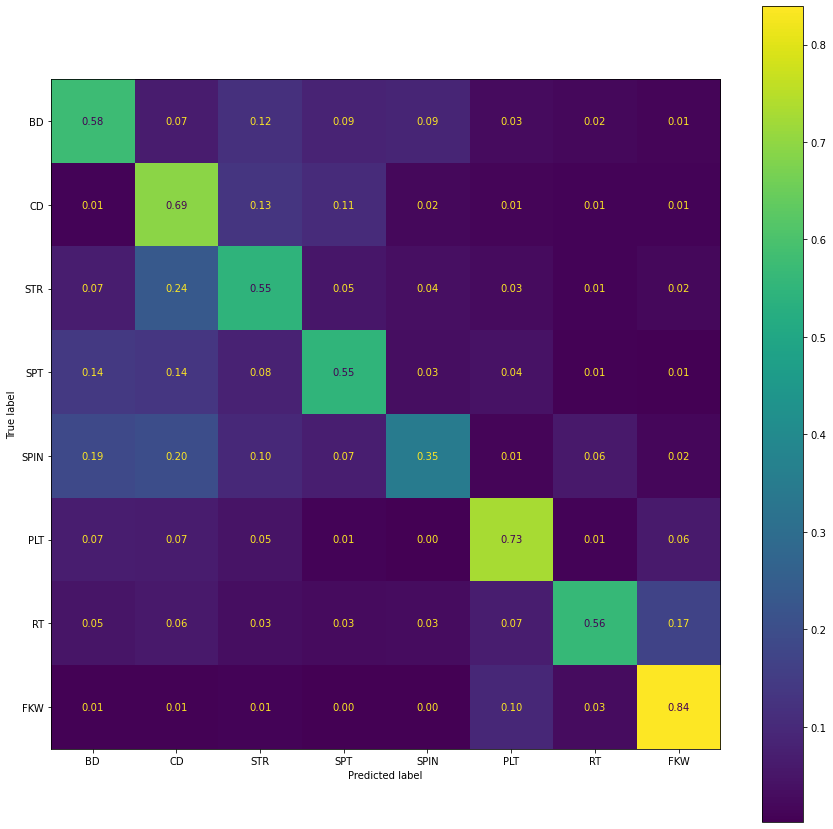

In [28]:
fig, ax = plt.subplots(figsize=[15, 15])
disp2.plot(include_values=True,
                     cmap='viridis', ax=ax, xticks_rotation='horizontal',
                     values_format='.2f', colorbar=True)